In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('../input/vehicle-dataset-from-cardekho/Car details v3.csv')
df2=df

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [67]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [68]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# Convert to Integer engine, max_power, mileage - Done
# Extracting Company Names - Done
# Convert Torque to INteger and then divide it by RPM
# Convert KGM to NM  - Done
# Binning of Seats
# Convert year to time period i.e. 2020-x - Done
# Fill the missing value on bais of Company, Age and Transmission
# Check if data for cars that have missing values exist in the dataset

In [69]:
df.loc[(df['max_power'].notnull() & df['mileage'].isnull())]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
575,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
576,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
1442,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
1443,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2549,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
2550,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN


In [70]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [71]:
df[df['mileage'].isnull()].engine.isnull().sum()
# Engine Missing == Mileage Missing

221

 # Extracting Company Names 

In [72]:
company_df = df.name
company_df = company_df.str.split(' ').str[0]
df['company_name'] = company_df
df['model_name'] = df.apply(lambda row : row['name'].replace(str(row['company_name']), ''), axis=1)

In [73]:
df.drop('name', axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company_name,model_name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


In [74]:
# mileage          221
# engine           221
# max_power        215
# torque           222
# seats            221

# df['mileage_ctr'] = np.where(df['mileage'].isnull(), 1, 0)
# df['engine_ctr'] = np.where(df['engine'].isnull(), 1, 0)
# df['max_power_ctr'] = np.where(df['max_power'].isnull(), 1, 0)
# df['torque_ctr'] = np.where(df['torque'].isnull(), 1, 0)
# df['seats_ctr'] = np.where(df['seats'].isnull(), 1, 0)
# Torque_RPM has been set 0000 for missing values, needs to be updated by the mean value based on company, age

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
 12  company_name   8128 non-null   object 
 13  model_name     8128 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 889.1+ KB


In [76]:
# df['mileage'].fillna(df['mileage'].mean, inplace = True)
# # df['engine'].fillna(0, inplace = True)
# # df['max_power'].fillna(0, inplace = True)
# # df['torque'].fillna(0, inplace = True)
# # df['seats'].fillna(0, inplace = True)

In [77]:
df['mileage'] = df['mileage'].str.rstrip(' kmpl')
df['mileage'] = pd.to_numeric(df['mileage'],errors='coerce')
df['mileage'].fillna(19.30, inplace = True)

In [78]:
df['engine'] = df['engine'].str.split(' ').str[0]
df['max_power'] = df['max_power'].str.split(' ').str[0]
df['engine'] = pd.to_numeric(df['engine'],errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'],errors='coerce')
df['max_power'].fillna(91.517, inplace = True)
df['engine'].fillna(1458.625, inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
 12  company_name   8128 non-null   object 
 13  model_name     8128 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 889.1+ KB


In [80]:
df['torque'] = df['torque'].astype(str)
df['seats'] = df['seats'].astype(str)
dum_torque = df.torque
num_1 = df.torque.str.extract('([+-]?([0-9]*[.])?[0-9]+)')[0]
df['torque_new'] = num_1
df['torque'] = df.apply(lambda row : row['torque'].replace(str(row['torque_new']), ''), axis=1)
df['torque'] = df.apply(lambda row : row['torque'].replace(str(','), ''), axis=1)
df['torque_unit'] = df['torque'].str.split('@').str[0]
df['torque_unit'].str.lower()
df['torque_unit'] = np.where(df['torque_unit'].str.contains('kgm'),'kgm','nm')
df['torque_rpm'] = df['torque'].str.split('@').str[1]
df['torque_rpm'] = df.torque_rpm.str.extract('([+-]?([0-9]*[.])?[0-9]+)')[0]

In [81]:
df['torque_new'] = pd.to_numeric(df['torque_new'],errors='coerce')
df['torque_rpm'] = pd.to_numeric(df['torque_rpm'],errors='coerce')

In [82]:
fix_trq = df[df['torque_rpm']<1000]
fix_trq['torque_rpm'] = fix_trq['torque'].str.split('-').str[1]
fix_trq['torque_rpm'].fillna('0000rpm',inplace =True)
fix_trq['torque_rpm'] = fix_trq['torque_rpm'].str.slice(start=0,stop=4)
df[df['torque_rpm']<1000] = fix_trq
df['torque_rpm'] = pd.to_numeric(df['torque_rpm'],errors='coerce')
df['torque_rpm'].fillna(0,inplace = True)
df['torque_rpm'] = np.where(df['torque_rpm'] == 0, df['torque_rpm'].mean(),df['torque_rpm'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  torque         8128 non-null   object 
 11  seats          8128 non-null   object 
 12  company_name   8128 non-null   object 
 13  model_name     8128 non-null   object 
 14  torque_new     7906 non-null   float64
 15  torque_unit    8128 non-null   object 
 16  torque_rpm     8128 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 1.1

In [84]:
# Converted all the KGM torques to NM
df['torque_new'] = np.where(df['torque_unit']=='kgm',df['torque_new']*9.8,df['torque_new']*1)
df['torque_new'].fillna(170.445, inplace = True)
df.drop('torque_unit',inplace = True, axis =1)

In [85]:
# # Convert Year to Car Age
df['Car_Age'] = 2020 - df['year']
df['Car_Age'] = np.where(df['Car_Age']>5, '5+',df['Car_Age'])
df['Car_Age'] = df['Car_Age'].astype('str')

df.drop('year', inplace = True, axis = 1)

df['torque_rpm'] = np.where(df['torque_rpm']==0, )

# ****sns.scatterplot(data=df, x = 'torque_rpm', y = 'company_name')

In [86]:
# For the time being I am filling all the values with column mean/median

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  torque         8128 non-null   object 
 11  seats          8128 non-null   object 
 12  company_name   8128 non-null   object 
 13  model_name     8128 non-null   object 
 14  torque_new     8128 non-null   float64
 15  torque_rpm     8128 non-null   float64
 16  Car_Age        8128 non-null   object 
dtypes: float64(5), int64(3), object(9)
memory usage: 1.1

In [88]:
df.drop(columns =['torque','year'], inplace = True, axis =1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         8128 non-null   float64
 8   max_power      8128 non-null   float64
 9   seats          8128 non-null   object 
 10  company_name   8128 non-null   object 
 11  model_name     8128 non-null   object 
 12  torque_new     8128 non-null   float64
 13  torque_rpm     8128 non-null   float64
 14  Car_Age        8128 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 952.6+ KB


In [90]:
# Seats
df['seats'].fillna('5.0', inplace  = True)
df['seats'] = np.where(df['seats']=='nan','5.0',df['seats'])

In [91]:
df['seats'].unique()

array(['5.0', '4.0', '7.0', '8.0', '6.0', '9.0', '10.0', '14.0', '2.0'],
      dtype=object)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   engine         8128 non-null   float64
 8   max_power      8128 non-null   float64
 9   seats          8128 non-null   object 
 10  company_name   8128 non-null   object 
 11  model_name     8128 non-null   object 
 12  torque_new     8128 non-null   float64
 13  torque_rpm     8128 non-null   float64
 14  Car_Age        8128 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 952.6+ KB


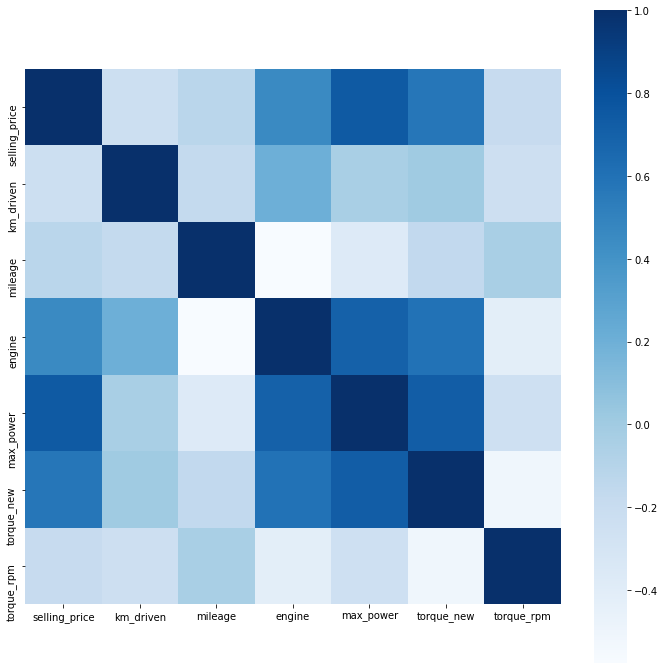

In [93]:
all_features =df
corrmat = all_features.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Blues",square=True);

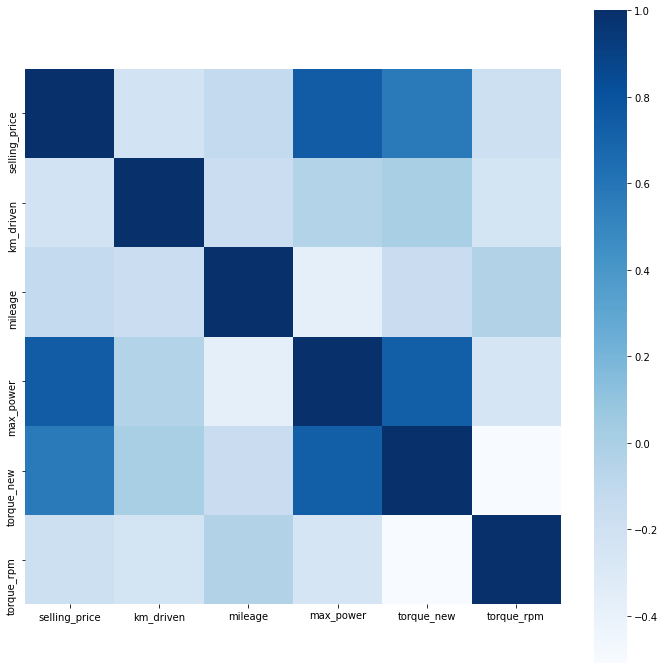

In [94]:
all_features.drop('engine',inplace = True,axis=1)
corrmat = all_features.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Blues",square=True);

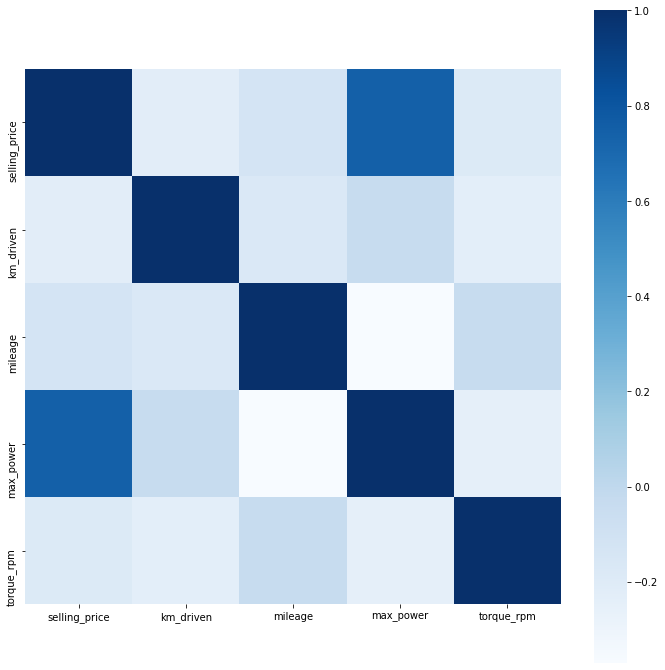

In [95]:
all_features.drop('torque_new',inplace = True,axis=1)
corrmat = all_features.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Blues",square=True);

In [96]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   fuel           8128 non-null   object 
 3   seller_type    8128 non-null   object 
 4   transmission   8128 non-null   object 
 5   owner          8128 non-null   object 
 6   mileage        8128 non-null   float64
 7   max_power      8128 non-null   float64
 8   seats          8128 non-null   object 
 9   company_name   8128 non-null   object 
 10  model_name     8128 non-null   object 
 11  torque_rpm     8128 non-null   float64
 12  Car_Age        8128 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 825.6+ KB


In [97]:
sns.pairplot(df)

SyntaxError: unexpected EOF while parsing (<ipython-input-97-03ef51de569c>, line 1)

In [ ]:
df.drop('model_name', inplace = True, axis=1)
df = pd.get_dummies(df).reset_index(drop=True)
df.shape

In [ ]:
y =df['selling_price']
df.drop('selling_price', inplace =  True, axis =1)
x= df

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
top_cols = SelectPercentile(mutual_info_regression, percentile =25)
top_cols.fit(x,y)

In [ ]:
final_cols = x.columns[top_cols.get_support()]

In [ ]:
x = x[final_cols]
x['selling_price'] =y

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.1,n_neighbors=5)
lof.fit(x)
output_lof = pd.DataFrame(lof.fit_predict(x),columns=['y'])
output_lof['y'].value_counts()

In [ ]:
# #Using Isolation Forest
# from sklearn.ensemble import IsolationForest

# isoClf = IsolationForest(n_estimators=100)
# isoClf.fit(x)
# output_isof = pd.DataFrame(isoClf.predict(x),columns=['y'])
# output_isof['y'].value_counts()

In [ ]:
x = pd.concat([output_lof, x], axis=1)

In [ ]:
x_no_out = x[x.y==1]
# Removing the outliers

In [ ]:
x_no_out.info()

In [ ]:
# scaling of data
target = x_no_out['selling_price']
x_no_out.drop(columns = ['y', 'selling_price'])
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_no_out)
predictors = pd.DataFrame(scaler.transform(x_no_out))

In [ ]:
predictors.head()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [ ]:
from sklearn import linear_model
# Initialize model
regression_model = linear_model.LinearRegression()
regression_model.fit(xtrain, ytrain)

In [ ]:
regression_model.score(X = xtrain, 
                       y = ytrain)

In [ ]:
#test score
regression_model.score(xtest, ytest) 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

In [ ]:
xtrain_poly = poly_features.fit_transform(xtrain)
poly_regression_model = linear_model.LinearRegression()
poly_regression_model.fit(xtrain_poly, ytrain)

In [ ]:
poly_regression_model.score(X = xtrain_poly, y = ytrain)

In [ ]:
#test score
xtest_poly = poly_features.fit_transform(xtest)
poly_regression_model.score(X = xtest_poly, y = ytest) 

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=40000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

ridge_reg.fit(xtrain_poly,ytrain)

ridge_reg.score(X = xtrain_poly, y = ytrain)

In [ ]:
ridge_reg.score(X = xtest_poly, y = ytest)

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=49)

lasso_reg.fit(xtrain_poly,ytrain)

lasso_reg.score(X = xtrain_poly, y = ytrain)

In [ ]:
lasso_reg.score(X = xtest_poly, y = ytest) 

In [ ]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=28,l1_ratio=0.8)

en_reg.fit(xtrain_poly,ytrain)

en_reg.score(X = xtrain_poly, y = ytrain)

In [ ]:
en_reg.score(X = xtest_poly, y = ytest) 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.01,l1_ratio=0.8)
X_temp=pd.DataFrame(scaler.transform(predictors))
X = poly_features.fit_transform(X_temp)

Y=target

scores = cross_val_score(en_reg,X, Y, 
                      cv=10,scoring='r2')
print (scores)

